In [1]:
# Stock Project
# Joshua Sloves, Sean Trehy, Jose __   <-- FILL IN
#read data from data.csv
import numpy as np
import pandas as pd
import datetime as dtime
import matplotlib.pyplot as plt
import seaborn as sns

filepath = '/home/jose/Documents/stocks/data.csv'
data = pd.read_csv(filepath)
df = pd.DataFrame(data)
df.head()

,date,signal,spy_close_price
0,20120103,3.107767,127.495
1,20120104,3.107282,127.700
2,20120105,3.099757,128.040
3,20120106,3.134223,127.710
4,20120109,3.135922,128.020


In [2]:
import datetime
from datetime import timedelta

dates = df['date']
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head(5)
# ***************to be deleted***************
# df['date'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
# def dateconvert(x):
#     x = str(x)
#     date = datetime(year=int(x[0:4]), month=int(x[4:6]), day=int(x[6:8]))
#     return date
# dates = dates.apply(dateconvert)
# df['date'] = dates

,date,signal,spy_close_price
0,2012-01-03,3.107767,127.495
1,2012-01-04,3.107282,127.700
2,2012-01-05,3.099757,128.040
3,2012-01-06,3.134223,127.710
4,2012-01-09,3.135922,128.020


In [3]:
#cleaning the data
print("Shape before cleaning: ",df.shape)

#check for null values
df.isnull().sum()

#check for weekends 
df["day_of_the_week"] = df["date"].dt.weekday
weekend = df.query("day_of_the_week > 4")
df = df.drop([525,526],axis=0)
df = df.drop(['day_of_the_week'],axis=1)
print("Shape after cleaning: ",df.shape)

Shape before cleaning:  (667, 3)
Shape after cleaning:  (665, 3)


In [4]:
print("Signal mean: ",df['signal'].mean())
print("Signal median: ",df['signal'].median())

Signal mean:  5.168708372412031
Signal median:  3.8868932039999997


In [5]:
print("Spy_close_price mean: ",df['spy_close_price'].mean())
print("Spy_close_price median: ",df['spy_close_price'].median())

Spy_close_price mean:  163.1197127819549
Spy_close_price median:  159.68


In [6]:
print("Max date: ",df['date'].max())
print("Min date: ",df['date'].min())

Max date:  2014-08-29 00:00:00
Min date:  2012-01-03 00:00:00


In [7]:
dates = df['date']
dup = dates.duplicated()
dup[dup == True]

Series([], Name: date, dtype: bool)

/home/jose/anaconda3/envs/myenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


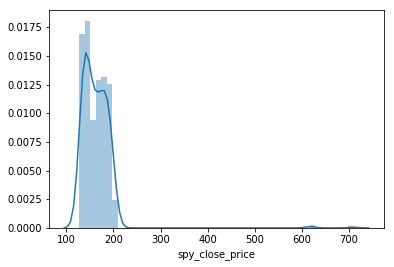

In [8]:
# with outliers
sns.distplot(df['spy_close_price'])

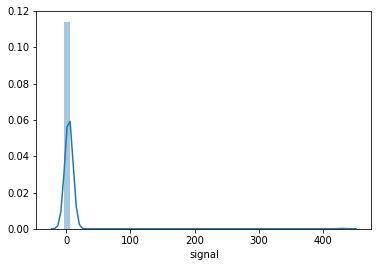

In [9]:
# with outliers
sns.distplot(df['signal'])

In [10]:
#find outliers in date by turning to datetime data type
#outliers appear to be dates at year 1970

x = df['signal']
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
outliers = x[((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR)))]
outliersi = outliers.index
signal_outliers = outliersi
print(outliers)
df = df.drop([303,459,460,570,571,572],axis=0)

303     -3.802670
459    429.514563
460    432.961165
570      0.004560
571      0.454976
572      0.455898
Name: signal, dtype: float64


In [11]:
#find outliers in date by turning to datetime data type
#outliers appear to be dates at year 1970

x = df['spy_close_price']
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
outliers = x[((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR)))]
outliersi = outliers.index
price_outliers = outliersi
print(outliers)
df = df.drop([421,422,423],axis=0)

421    618.95
422    619.33
423    710.31
Name: spy_close_price, dtype: float64


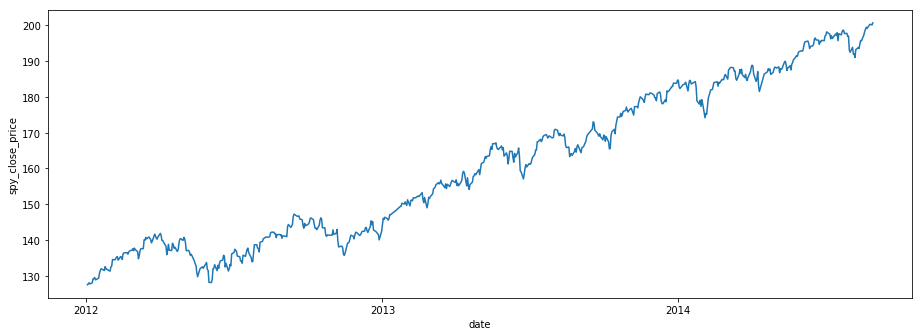

In [12]:
#date vs spy_close_price
from matplotlib import dates
import matplotlib.pyplot as plt

locator = dates.YearLocator()
fig = plt.figure()

ax = fig.add_axes(([0,0,2,1]))
ax.set_xlabel('date')
ax.set_ylabel('spy_close_price')

ax.plot(df['date'],df['spy_close_price'])
ax.xaxis.set_major_locator(locator)
ax.axis('auto')
plt.show()

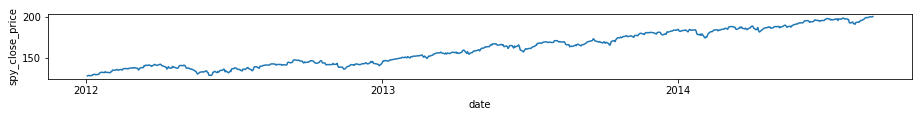

In [13]:
#date vs spy_close_price

locator = dates.YearLocator()
fig = plt.figure()
ax = fig.add_axes(([0,0,2,1]))
ax.set_xlabel('date')
ax.set_ylabel('spy_close_price')

ax.plot(df['date'].values,df['spy_close_price'].values)
ax.xaxis.set_major_locator(locator)
ax.axis('scaled')
plt.show()

In [15]:
X = df.as_matrix(['signal'])
y = df.as_matrix(['spy_close_price'])

/home/jose/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/jose/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Coefficients: 
 [[40.74788783]]
Mean squared error: 3.92
R-squared = : 0.99


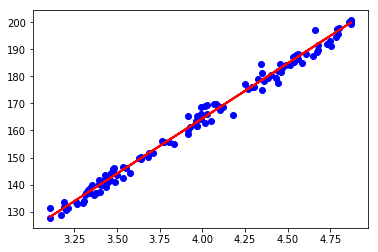

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size= 0.8, test_size=0.2, random_state = 0)
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('R-squared = : %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)



In [17]:
import math
# Have a look at R sq to give an idea of the fit 
print('R sq: ',regr.score(X_train,y_train))

# and so the correlation is..
print('Correlation: ', math.sqrt(regr.score(X_train,y_train)))

R sq:  0.9899662542679813
Correlation:  0.9949704790937173


/home/jose/anaconda3/envs/myenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


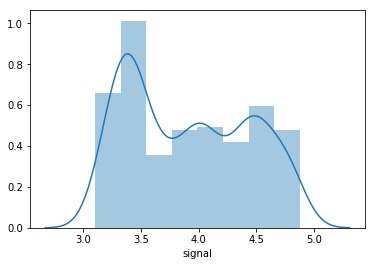

In [18]:
# without outliers
sns.distplot(df['signal'])

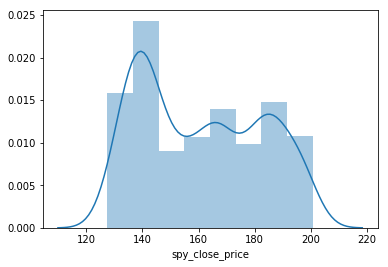

In [19]:
# without outliers
sns.distplot(df['spy_close_price'])

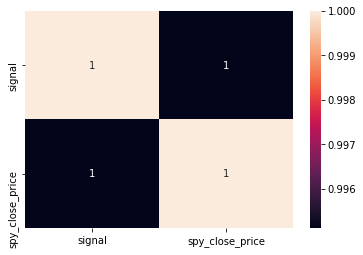

In [20]:
sns.heatmap(df.corr(), annot=True)

In [22]:
#criteria to predict the future (5 days into the future?)
shift_days = 5
target_names = ['signal','spy_close_price']
df_targets = df[target_names]
df_targets_shifted = df[target_names].shift(-shift_days)
df[target_names] = df_targets[target_names]
#df_targets

In [23]:
#criteria to predict the future (5 days into the future?)
shift_days = 5
xtarget_names = ['signal']
xdf_targets = df[xtarget_names]
#xdf_targets_shifted = df[target_names].shift(-shift_days)
#xdf[target_names] = df_targets[target_names]
#df_targets

In [2]:
#These are the input signals
x_data = xdf_targets.values[0:-shift_days]
print(type(x_data))
print("Shape:", x_data.shape)
print(x_data)

NameError: name 'xdf_targets' is not defined

In [25]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#These are the output signals (target signals)
y_data = df_targets.values[:-shift_days]
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (651, 2)


In [26]:
#Total number of observations
num_data = len(x_data)
num_data

train_split = 0.9

num_train = int(train_split * num_data)
num_test = num_data - num_train

In [27]:
#input signals for training and test sets
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

651

In [28]:
#output signals for training and test sets
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

651

In [29]:
#Number of input signals
num_x_signals = x_data.shape[1]
print(num_x_signals)
#Number of output signals
num_y_signals = y_data.shape[1]
print(num_y_signals)

1
2


In [31]:
#Scale Data
sc = MinMaxScaler()
x_train_scaled = sc.fit_transform(x_train)

x_test_scaled = sc.transform(x_test)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [32]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(585, 1)
(585, 2)


In [33]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [34]:
batch_size  = 256
sequence_length = 5 * 4 #20 days total (roughly one month of market activity)

In [35]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [36]:
x_batch, y_batch = next(generator)
print(x_batch.shape)
print(y_batch.shape)

(256, 20, 1)
(256, 20, 2)


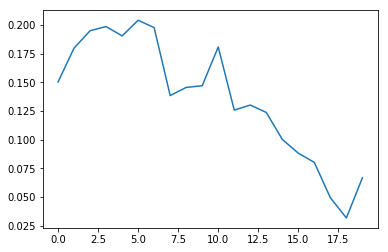

In [37]:
#Plotting one of the input signals
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 3 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

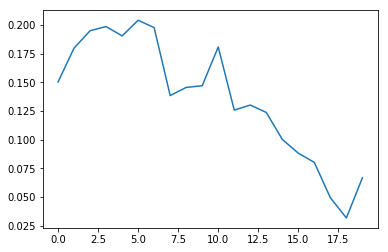

In [38]:
#Plotting one of the output signals
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [39]:
#Validation Data - measuring prediction accuracy
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [40]:
# create recurrent neural network
model = Sequential()
model.add(GRU(units = 512, return_sequences=True, input_shape=(None, num_x_signals)))
model.add(Dense(num_y_signals, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
# Compile model

model.compile(loss = 'mean_squared_error', optimizer = RMSprop(lr=1e-3))
# Fit the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         789504    
_________________________________________________________________
dense (Dense)                (None, None, 2)           1026      
Total params: 790,530
Trainable params: 790,530
Non-trainable params: 0
_________________________________________________________________


In [41]:
#Callback Functions
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
#Callback for writing checkpointsduring training
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [42]:
#Callbacks for stopping the optimization when performance decreases

callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [43]:
#This is the callback for writing the TensorBoard log during training.

callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [44]:
#Reduces the learning rate for the optimizer if the validation-loss has not improved since the last epoch.
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [45]:
#This callback reduces the learning-rate for the optimizer if the validation-loss has not improved since the last epoch (as indicated by patience=0). 
#The learning-rate will be reduced by multiplying it with the given factor. 
#We set a start learning-rate of 1e-3 above, so multiplying it by 0.1 gives a learning-rate of 1e-4. 
#We don't want the learning-rate to go any lower than this.


callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [46]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [47]:
#Training the Recurrent Neural Network

%time
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=30,
                    validation_data=validation_data,
                    callbacks=callbacks)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Epoch 1/20
29/30 [============================>.] - ETA: 0s - loss: 0.0429
Epoch 00001: val_loss improved from inf to 0.01203, saving model to 23_checkpoint.keras
30/30 [==============================] - 27s 904ms/step - loss: 0.0419 - val_loss: 0.0120
Epoch 2/20
29/30 [============================>.] - ETA: 0s - loss: 0.0088
Epoch 00002: val_loss improved from 0.01203 to 0.01144, saving model to 23_checkpoint.keras
30/30 [==============================] - 26s 862ms/step - loss: 0.0088 - val_loss: 0.0114
Epoch 3/20
29/30 [============================>.] - ETA: 0s - loss: 0.0049
Epoch 00003: val_loss improved from 0.01144 to 0.00632, saving model to 23_checkpoint.keras
30/30 [==============================] - 27s 909ms/step - loss: 0.0049 - val_loss: 0.0063
Epoch 4/20
29/30 [============================>.] - ETA: 1s - loss: 0.0032
Epoch 00004: val_loss improved from 0.00632 to 0.00360, saving model to 23_checkpoint.keras
30

In [48]:
#Reload last saved checkpoint if performance has worsened
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [49]:
#Evaluating our model's performance on the test set
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 113ms/step


In [50]:
print("loss (test-set):", result)

loss (test-set): 0.0006302887923084199


In [51]:
#Function to plot predicted and output signals
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

In [52]:
warmup_steps = 50

def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean


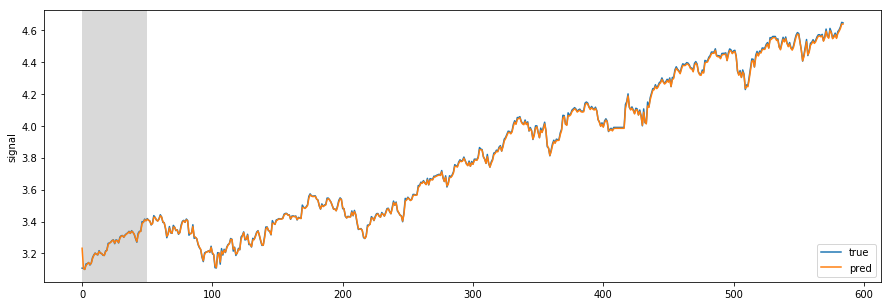

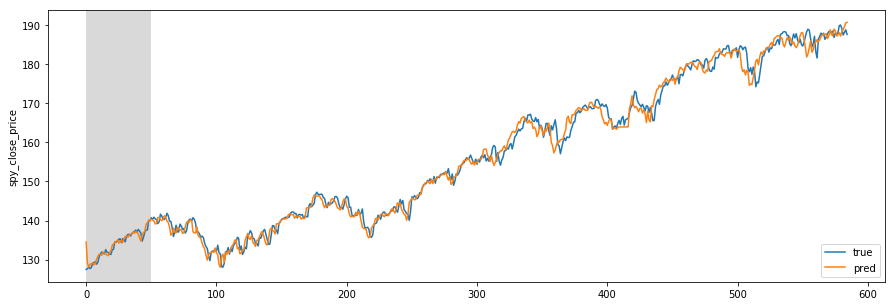

In [53]:
# Exhaustive prediction using neural networking to predict price based on signal
plot_comparison(start_idx=0, length=1000, train=True)


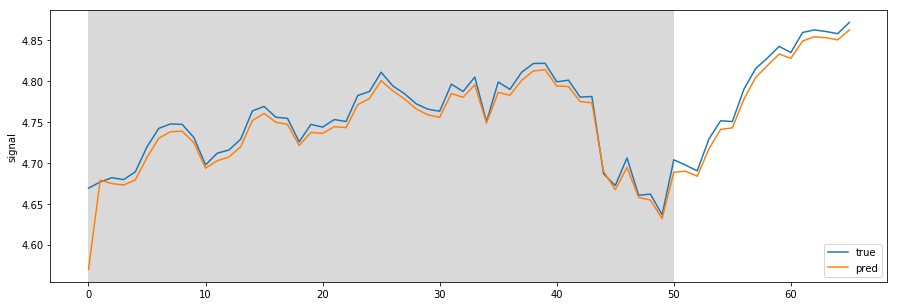

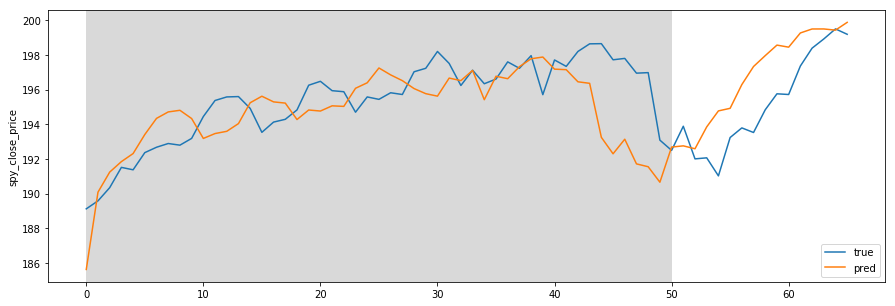

In [54]:
# Predictions with the test data
plot_comparison(start_idx=0, length=1000, train=False)

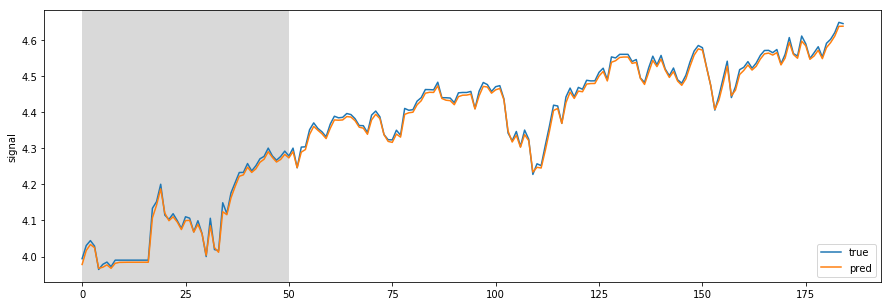

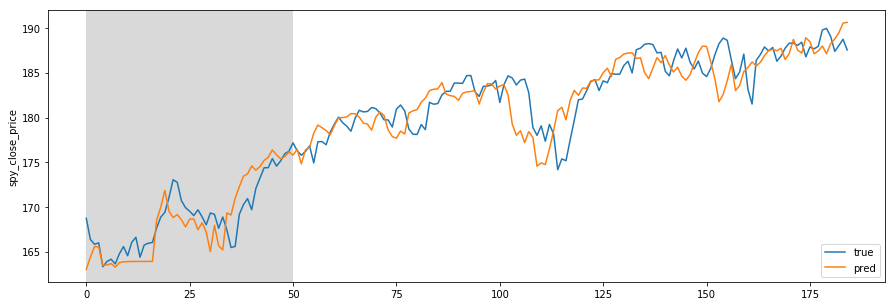

In [55]:
# Predictions with the training data
plot_comparison(start_idx=400, length=1000, train=True)

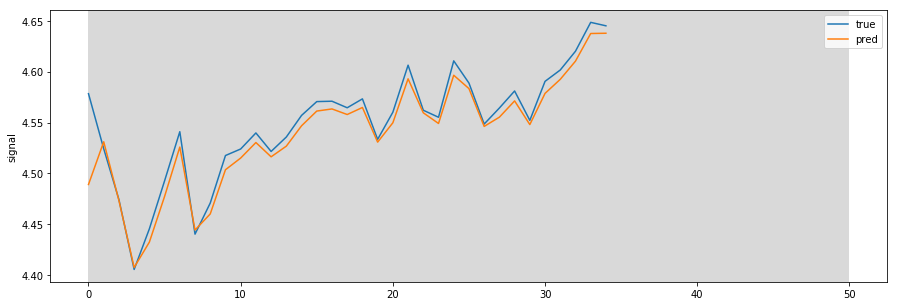

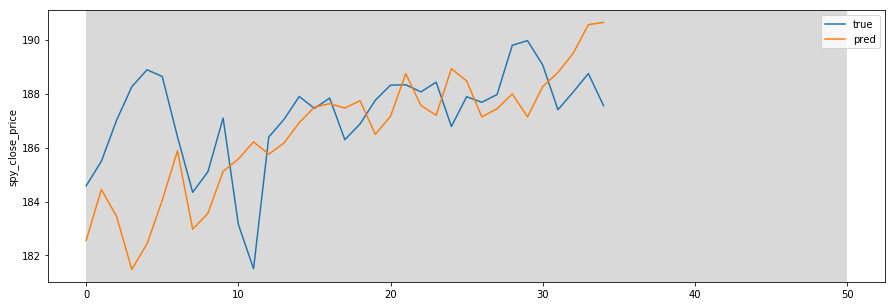

In [58]:
# Another training set, with a smaller sample. Explains why the grey area covers the whole graph. It has not learned enough.
plot_comparison(start_idx=550, length=1000, train=True)

In [57]:
# references
# https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html
# http://earthpy.org/pandas-basics.html
# https://stackoverflow.com/questions/37219655/matplotlib-how-to-specify-time-locators-start-ticking-timestamp
# https://matplotlib.org/api/ticker_api.html
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axis.html
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/23_Time-Series-Prediction.ipynb

SyntaxError: invalid syntax (<ipython-input-57-a1970c5460ed>, line 2)